# Try to generate a MasterFlat from notebook


- work with Weakly_2022_39
- use jupyter kernel LSST



- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/11/22



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/atmospec 	setup
drp_pipe              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/drp_pipe 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_39/conda/envs/lsst-scipipe-4.1.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/rapid_analysis 	setup


In [2]:
! echo $IMAGE_DESCRIPTION
! eups list -s lsst_distrib


   g0b29ad24fb+a10408d0bf 	w_latest current w_2022_39 setup


In [3]:
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [4]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [5]:
# Butler
import lsst.daf.butler as dafButler

In [6]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

## List of Exposures from raw

In [7]:
df_exposure = pd.DataFrame(columns=['id', 'obs_id','day_obs', 'seq_num', 'type', 'target','filter','zenith_angle','ra','dec','skyangle','exptime'])

In [8]:
for count, info in enumerate(registry.queryDimensionRecords('exposure')):
    
    
    df_exposure.loc[count] = [info.id, info.obs_id, info.day_obs, info.seq_num, info.observation_type, info.target_name, info.physical_filter, info.zenith_angle, \
                             info.tracking_ra, info.tracking_dec, info.sky_angle,info.exposure_time]
    
    if count < 2:
        print("-----------------------------------------------------",count,"---------------------------------------------------------")
        print(info)
        print("\t id:                  ",info.id)
        print("\t day_obs:             ",info.day_obs)
        print("\t seq_num:             ",info.seq_num)
        print("\t type-of-observation: ",info.observation_type)
        print("\t target:              ",info.target_name)
        print("\t exposure_time:       ",info.exposure_time)
    

----------------------------------------------------- 0 ---------------------------------------------------------
exposure:
  instrument: 'LATISS'
  id: 2021021600208
  physical_filter: 'empty~empty'
  obs_id: 'AT_O_20210216_000208'
  exposure_time: 2.0
  dark_time: 2.33517265319824
  observation_type: 'science'
  observation_reason: 'science'
  day_obs: 20210216
  seq_num: 208
  group_name: '2021-02-17T03:35:45.035'
  group_id: 1934625450350000
  target_name: 'HD 50896'
  science_program: 'unknown'
  tracking_ra: 103.384001783548
  tracking_dec: -23.9734478006315
  sky_angle: -180.0
  zenith_angle: 24.314073266185005
  timespan: Timespan(begin=astropy.time.Time('2021-02-17 03:35:45.295446', scale='tai', format='iso'), end=astropy.time.Time('2021-02-17 03:35:47.540000', scale='tai', format='iso'))
	 id:                   2021021600208
	 day_obs:              20210216
	 seq_num:              208
	 type-of-observation:  science
	 target:               HD 50896
	 exposure_time:        2.0

In [9]:
df_exposure

,id,obs_id,day_obs,seq_num,type,target,filter,zenith_angle,ra,dec,skyangle,exptime
0,2021021600208,AT_O_20210216_000208,20210216,208,science,HD 50896,empty~empty,24.314073,103.384002,-23.973448,-180.0,2.0
1,2021021600163,AT_O_20210216_000163,20210216,163,science,HD 50896,RG610~empty,14.580611,103.404029,-23.92939,-208.621712,3.0
2,2021021600070,AT_O_20210216_000070,20210216,70,bias,azel_target,empty~empty,None,None,None,None,0.0
3,2021021600173,AT_O_20210216_000173,20210216,173,science,HD 50896,RG610~empty,8.82931,103.395986,-23.927038,-208.621712,2.0
4,2021021600001,AT_O_20210216_000001,20210216,1,bias,azel_target,empty~empty,None,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21152,2022063000801,AT_O_20220630_000801,20220630,801,science,AUXTEL_DRP_IMAGING:WFI-2026-4536_062,SDSSr~empty,36.396484,306.677395,-45.325215,359.998841,30.0
21153,2022063000802,AT_O_20220630_000802,20220630,802,science,AUXTEL_DRP_IMAGING:WFI-2026-4536_063,SDSSr~empty,36.437127,306.811224,-45.325305,0.005404,30.0
21154,2022063000803,AT_O_20220630_000803,20220630,803,science,AUXTEL_DRP_IMAGING:WFI-2026-4536_063,SDSSr~empty,36.530061,306.811146,-45.325195,359.99891,30.0
21155,2022063000804,AT_O_20220630_000804,20220630,804,science,AUXTEL_DRP_IMAGING:WFI-2026-4536_064,SDSSr~empty,36.57364,306.944962,-45.325294,359.998843,30.0


## Selection of flats raw-exposures

In [10]:
df_flat = df_exposure[df_exposure.type == 'flat']

In [11]:
df_flat = df_flat.sort_values(by="day_obs",ascending=True)

In [12]:
df_flat.tail(50)

,id,obs_id,day_obs,seq_num,type,target,filter,zenith_angle,ra,dec,skyangle,exptime
18262,2022060900030,AT_O_20220609_000030,20220609,30,flat,FlatField position,FELH0600~empty,51.003456,None,None,None,6.00
18260,2022060900028,AT_O_20220609_000028,20220609,28,flat,FlatField position,FELH0600~empty,51.003452,None,None,None,6.00
18264,2022060900032,AT_O_20220609_000032,20220609,32,flat,FlatField position,FELH0600~empty,51.003458,None,None,None,6.00
18265,2022060900033,AT_O_20220609_000033,20220609,33,flat,FlatField position,FELH0600~empty,51.003461,None,None,None,6.00
18266,2022060900034,AT_O_20220609_000034,20220609,34,flat,FlatField position,FELH0600~empty,51.003461,None,None,None,6.00
18267,2022060900035,AT_O_20220609_000035,20220609,35,flat,FlatField position,BG40~empty,51.003498,None,None,None,6.00
18268,2022060900036,AT_O_20220609_000036,20220609,36,flat,FlatField position,BG40~empty,51.003493,None,None,None,6.00
18269,2022060900037,AT_O_20220609_000037,20220609,37,flat,FlatField position,BG40~empty,51.0035,None,None,None,6.00
18263,2022060900031,AT_O_20220609_000031,20220609,31,flat,FlatField position,FELH0600~empty,51.003456,None,None,None,6.00
19100,2022062800029,AT_O_20220628_000029,20220628,29,flat,FlatField position,FELH0600~empty,50.999871,None,None,None,1.80


# List of dates

In [13]:
list_of_dates_flats = df_flat['day_obs'].unique() 
list_of_dates_flats

array([20210216, 20210217, 20210218, 20210311, 20210608, 20210609,
       20210707, 20210708, 20210907, 20210908, 20210909, 20211005,
       20211006, 20211007, 20211102, 20211104, 20220215, 20220216,
       20220217, 20220315, 20220316, 20220317, 20220502, 20220503,
       20220504, 20220524, 20220607, 20220608, 20220609, 20220628,
       20220629, 20220630])

# List of filters

In [14]:
list_of_filters = df_flat['filter'].unique()
list_of_filters

array(['empty~empty', 'RG610~empty', 'empty~holo4_003', 'BG40~empty',
       'FELH0600~empty', 'SDSSg~empty', 'SDSSr~empty', 'SDSSi~empty',
       'SDSSg~holo4_003', 'SDSSr~holo4_003'], dtype=object)

# Selection of the filter

In [15]:
cut_filter = df_flat['filter'] == 'empty~empty'

In [16]:
for the_date in list_of_dates_flats:
    cut_date = df_flat['day_obs'] == the_date
    cut_combined = cut_date & cut_filter
    
    df_flat_this_date = df_flat[cut_combined]
    
    N = len(df_flat_this_date) 
    if N >0:
        print("=======================================================================")   
        print(f"{the_date} :: N={N}")
        print(df_flat_this_date.id.values)
    

20210216 :: N=40
[2021021600127 2021021600142 2021021600134 2021021600119 2021021600114
 2021021600145 2021021600146 2021021600147 2021021600120 2021021600112
 2021021600131 2021021600122 2021021600130 2021021600136 2021021600129
 2021021600135 2021021600140 2021021600149 2021021600137 2021021600150
 2021021600141 2021021600143 2021021600123 2021021600128 2021021600151
 2021021600132 2021021600121 2021021600125 2021021600113 2021021600117
 2021021600116 2021021600139 2021021600126 2021021600124 2021021600133
 2021021600115 2021021600118 2021021600138 2021021600148 2021021600144]
20210217 :: N=40
[2021021700126 2021021700099 2021021700113 2021021700122 2021021700115
 2021021700135 2021021700132 2021021700109 2021021700096 2021021700105
 2021021700120 2021021700123 2021021700102 2021021700098 2021021700121
 2021021700097 2021021700119 2021021700110 2021021700128 2021021700134
 2021021700118 2021021700127 2021021700107 2021021700129 2021021700100
 2021021700117 2021021700125 2021021700124

# View

In [17]:
cut_date = df_flat['day_obs'] == 20220317
cut_combined = cut_date & cut_filter

In [18]:
df_flat_this_date = df_flat[cut_combined]

In [19]:
N = len(df_flat_this_date)
df_flat_this_date = df_flat_this_date.sort_values(by="id").reset_index()

In [20]:
df_flat_this_date 

,index,id,obs_id,day_obs,seq_num,type,target,filter,zenith_angle,ra,dec,skyangle,exptime
0,13906,2022031700201,AT_O_20220317_000201,20220317,201,flat,azel_target,empty~empty,40.000002,None,None,None,10.0
1,13911,2022031700202,AT_O_20220317_000202,20220317,202,flat,azel_target,empty~empty,39.999999,None,None,None,30.0
2,13928,2022031700203,AT_O_20220317_000203,20220317,203,flat,azel_target,empty~empty,40.000001,None,None,None,30.0
3,14194,2022031700204,AT_O_20220317_000204,20220317,204,flat,azel_target,empty~empty,40.0,None,None,None,30.0
4,14171,2022031700205,AT_O_20220317_000205,20220317,205,flat,azel_target,empty~empty,40.0,None,None,None,30.0
5,13948,2022031700206,AT_O_20220317_000206,20220317,206,flat,azel_target,empty~empty,39.999998,None,None,None,30.0
6,13879,2022031700207,AT_O_20220317_000207,20220317,207,flat,azel_target,empty~empty,40.000002,None,None,None,30.0
7,14190,2022031700208,AT_O_20220317_000208,20220317,208,flat,azel_target,empty~empty,39.999999,None,None,None,30.0
8,14068,2022031700209,AT_O_20220317_000209,20220317,209,flat,azel_target,empty~empty,40.000003,None,None,None,30.0
9,14065,2022031700210,AT_O_20220317_000210,20220317,210,flat,azel_target,empty~empty,39.999999,None,None,None,30.0


## Make the list of raw exposures

In [ ]:
collection = "LATISS/calib"
datasetRefs = registry.queryDatasets(datasetType='*', collections=collection, where= "instrument='LATISS'")

In [52]:
from lsst.daf.butler import DeferredDatasetHandle

In [53]:
# DeferredDatasetHandle??

Init signature:
DeferredDatasetHandle(
    butler: 'LimitedButler',
    ref: 'DatasetRef',
    parameters: 'Optional[dict]',
) -> None
Source:        
@dataclasses.dataclass(frozen=True)
class DeferredDatasetHandle:
    """Proxy class that provides deferred loading of datasets from a butler."""

    def get(
        self, *, component: Optional[str] = None, parameters: Optional[dict] = None, **kwargs: dict
    ) -> Any:
        """Retrieves the dataset pointed to by this handle

        This handle may be used multiple times, possibly with different
        parameters.

        Parameters
        ----------
        component : `str` or None
            If the deferred object is a component dataset type, this parameter
            may specify the name of the component to use in the get operation.
        parameters : `dict` or None
            The parameters argument will be passed to the butler get method.
            It defaults to None. If the value is not None,  this dict will
     

/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/LATISS/raw/all/raw/20220317/AT_O_20220317_000201/raw_LATISS_empty~empty_AT_O_20220317_000201_RXX_S00_LATISS_raw_all.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/LATISS/raw/all/raw/20220317/AT_O_20220317_000202/raw_LATISS_empty~empty_AT_O_20220317_000202_RXX_S00_LATISS_raw_all.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/LATISS/raw/all/raw/20220317/AT_O_20220317_000203/raw_LATISS_empty~empty_AT_O_20220317_000203_RXX_S00_LATISS_raw_all.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/LATISS/raw/all/raw/2

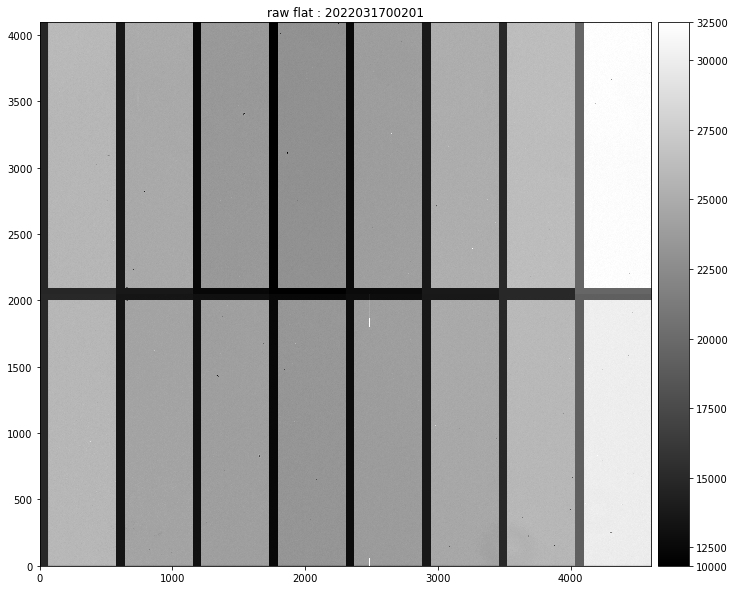

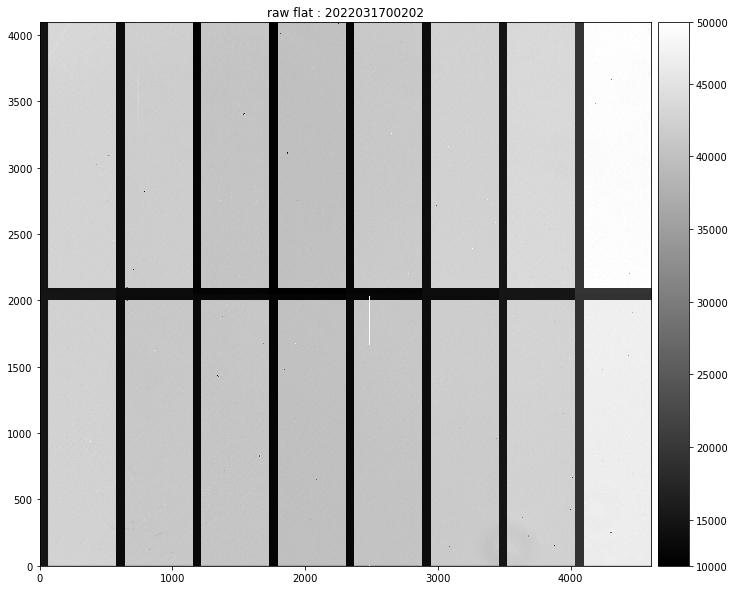

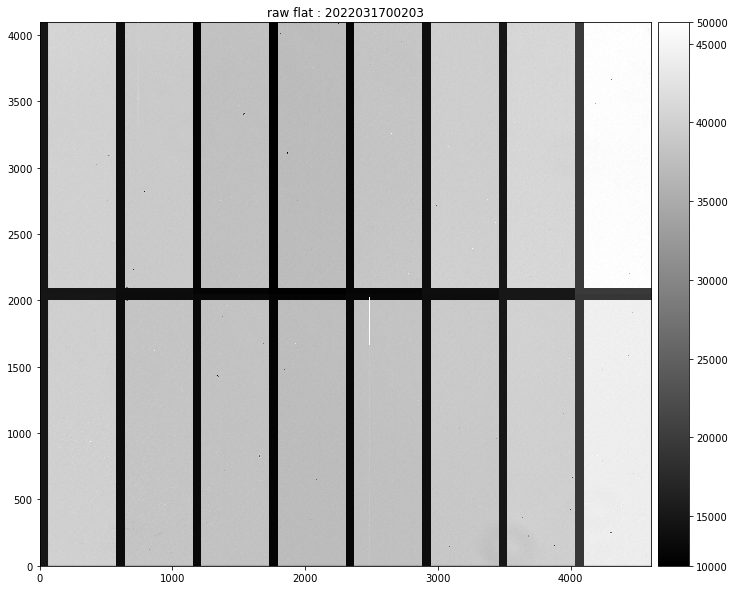

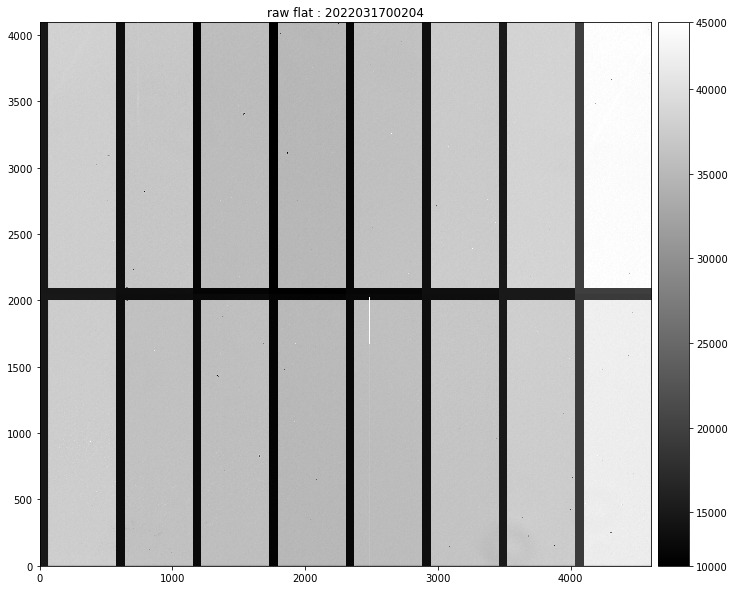

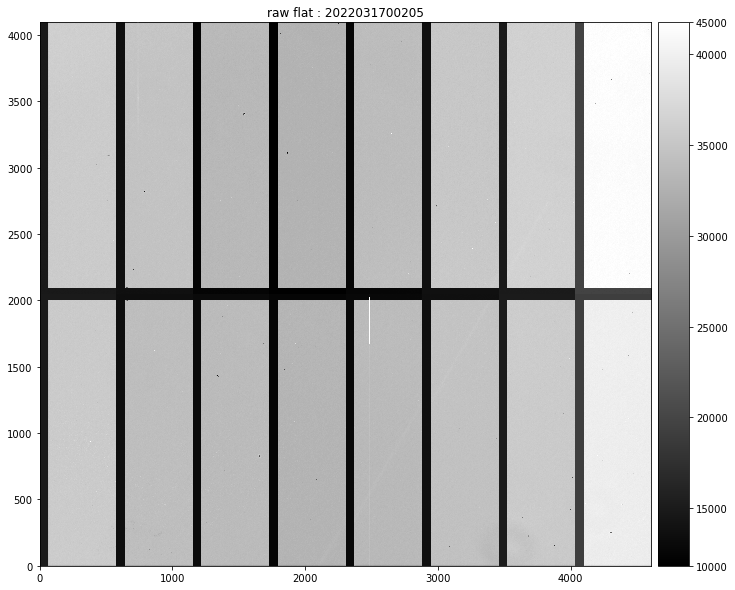

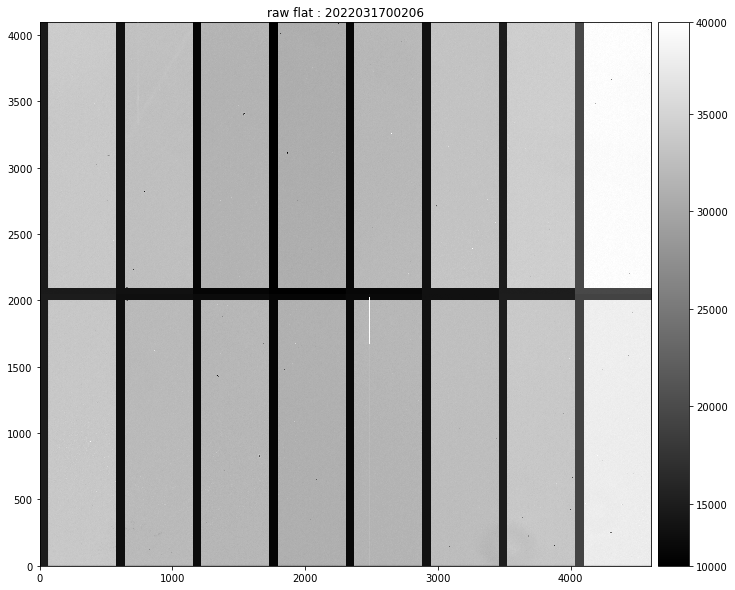

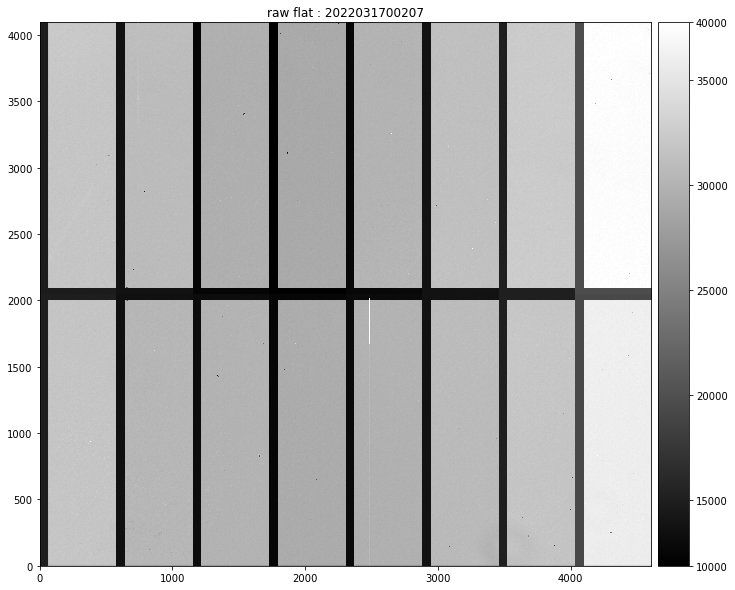

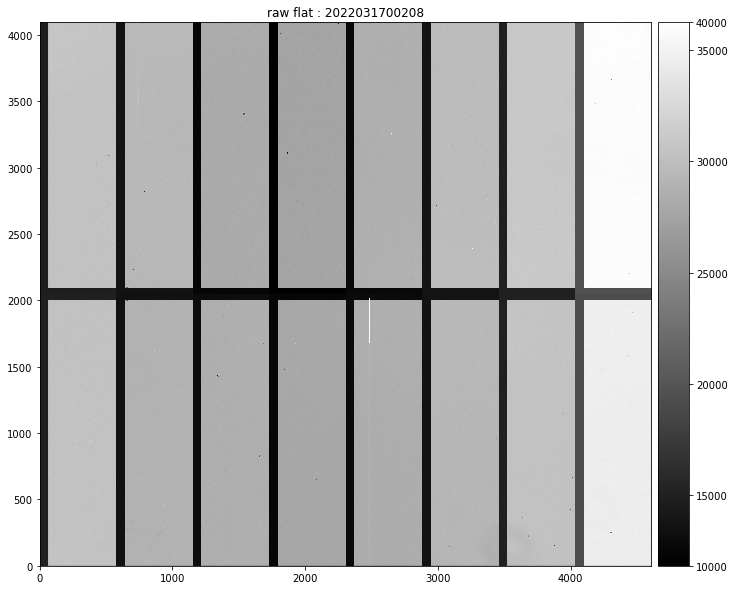

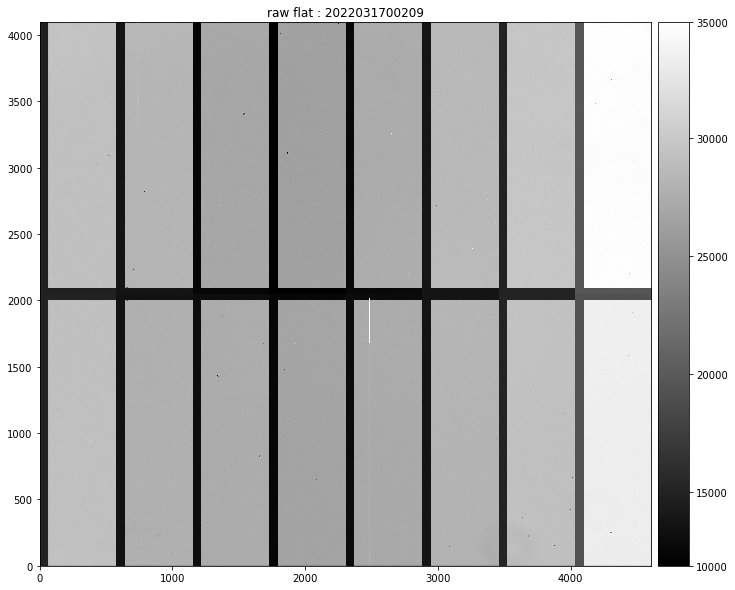

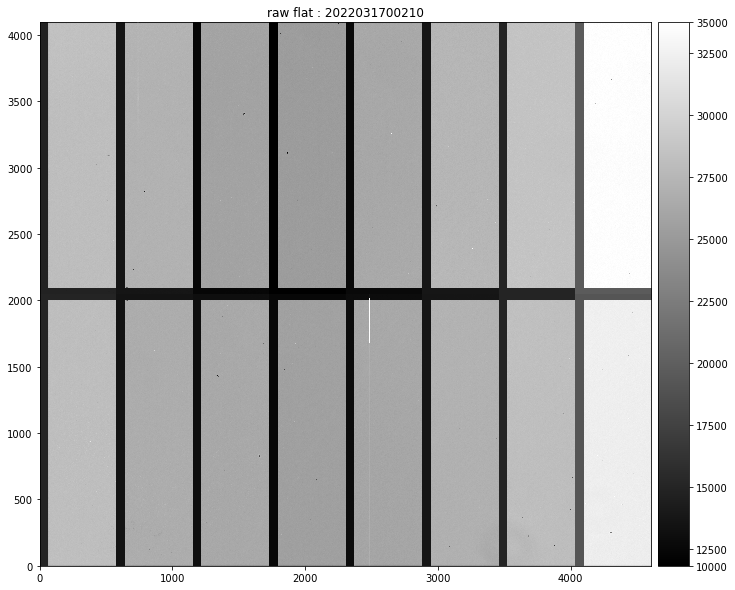

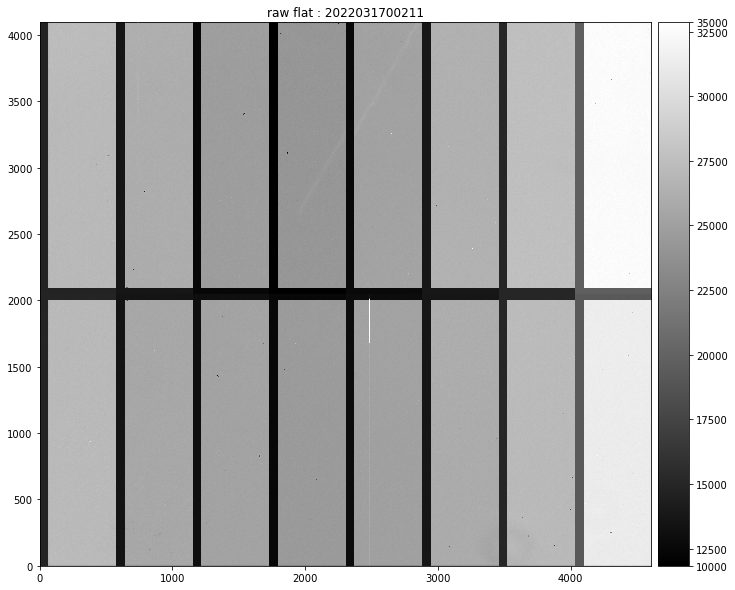

In [21]:
collection='LATISS/raw/all'
my_list_of_raw_flats = []
# loop on exposures
for idx in range(N):
    exposure_selected=df_flat_this_date.iloc[idx].id 
    
   
    raw_img = butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)
    my_list_of_raw_flats.append(raw_img) 
    
    
    fig = plt.figure(figsize=(12,10))
    afw_display = afwDisplay.Display(frame=fig)
    afw_display.scale('linear', 'zscale',None)
    title = f"raw flat : {exposure_selected}"
    afw_display.mtv(raw_img.image,title=title)
    #plt.gca().axis('off')
    

## CombineTask task

https://github.com/lsst/cp_pipe/blob/main/python/lsst/cp/pipe/cpCombine.py

In [22]:
from lsst.cp.pipe.cpCombine import CalibCombineConfig, CalibCombineTask
from lsst.cp.pipe.cpCombine import CalibCombineByFilterConfig, CalibCombineByFilterTask
from lsst.cp.pipe.cpCombine import CalibStatsConfig, CalibStatsTask

In [23]:
# Assembly task
# https://github.com/lsst/ip_isr/blob/main/python/lsst/ip/isr/isrTask.py

#from lsst.ip.isr.assembleCcdTask import (AssembleCcdConfig, AssembleCcdTask)
#from lsst.ip.isr.isrTask import (IsrTask, IsrTaskConfig)
#ass_config = AssembleCcdConfig(doTrim=True,keysToRemove=['SHEEP', 'MONKEYS', 'ZSHEEP'])
#ass_task = AssembleCcdTask(config=ass_config)

In [26]:
mflat_config2 = CalibCombineByFilterConfig
mflat_task2 = CalibCombineByFilterTask

In [27]:


mflat_config2.stat ="MEDIAN"

In [29]:
the_raw_flat = my_list_of_raw_flats[0]

In [33]:
the_raw_flat 

In [65]:
my_handle= DeferredDatasetHandle(butler=butler,parameters=['id':'2022031700201'])

SyntaxError: invalid syntax (998594638.py, line 1)

## Try CalibStatsTask

In [43]:
mflat_stat_config = CalibStatsConfig()
mflat_stat_config.stat="MEDIAN"

In [44]:
mflat_stat_task=CalibStatsTask(name="mystat",config=mflat_stat_config)

In [45]:
mflat_stat_task.run(exposureOrImage=the_raw_flat) 

24408.0

So obviously aplly the stat on the raw exposure (as expected)
but no ISR

# Try  CalibCombineConfig

In [47]:
mflat_config = CalibCombineConfig()

In [48]:
mflat_task = CalibCombineTask(config=mflat_config)

In [50]:
mflat_task.run([the_raw_flat]) 

AttributeError: 'lsst.afw.image.exposure._exposure.ExposureF' object has no attribute 'get'